**TF-IDF Berita**

In [2]:
import pandas as pd

# Baca dataset asli (bukan TF-IDF)
df = pd.read_csv("hasil_tfidf_berita.csv")  # ganti dengan nama file asli

# Jumlah total data
print("Jumlah Data:", len(df))

# Jumlah kolom
print("Jumlah Kolom:", len(df.columns))

# Jumlah kategori unik
print("Jumlah Kategori:", df['kategori'].nunique())

# Daftar kategori
print("Daftar Kategori:", df['kategori'].unique())

# Jumlah data tiap kategori
print("\nJumlah Data per Kategori:")
print(df['kategori'].value_counts())

Jumlah Data: 925
Jumlah Kolom: 18060
Jumlah Kategori: 37
Daftar Kategori: ['Jatim' 'Jatim Metro' 'Jatim Tengah' 'Jatim Utara' 'Jatim Selatan'
 'Jatim Timur' 'Jatim Barat' 'Jatim Madura' 'Nasional' 'Nusantara'
 'Politik' 'Birokrasi' 'Religia' 'T&J - Islam Sehari-hari'
 'Tafsir Al Quran Aktual' 'Pesantren' 'Ormas' 'Hukum - Kriminal' 'Ekonomi'
 'Entrepreneur' 'Sportainment' 'Selebriti' 'Wisata' 'Lifestyle' 'Olahraga'
 'Otomotif' 'Pendidikan' 'Kesehatan' 'Tren' 'Kuliner' 'Figur'
 'Sejarah dan Budaya' 'Dunia' 'Unik - Aneh' 'Peristiwa' 'Teknologi'
 'Komunitas dan Lingkungan']

Jumlah Data per Kategori:
kategori
Jatim                       25
Entrepreneur                25
Selebriti                   25
Wisata                      25
Lifestyle                   25
Olahraga                    25
Otomotif                    25
Pendidikan                  25
Kesehatan                   25
Tren                        25
Kuliner                     25
Figur                       25
Sejarah dan Bud

mengubah cnn.tokenized.csv ke bentuk tf idf

In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
df = pd.read_csv("hasil_preprocessing_berita.csv")
df.head()

,isi_berita,hasil_preprocessing,kategori
0,"SIDOARJO,BANGSAONLINE.com- Proses pencarian ko...","['sidoarjobangsaonlinecom', 'proses', 'cari', ...",Jatim
1,"PROBOLINGGO, BANGSAONLINE.com- Polres Probolin...","['probolinggo', 'bangsaonlinecom', 'polres', '...",Jatim
2,"KOTA KEDIRI, BANGSAONLINE.com- Wakil Wali Kota...","['kota', 'diri', 'bangsaonlinecom', 'wakil', '...",Jatim
3,"SURABAYA,BANGSAONLINE.com- Polsek Wonokromo m...","['surabayabangsaonlinecom', 'polsek', 'wonokro...",Jatim
4,"SIDOARJO,BANGSAONLINE.com- Polwan Polresta Sid...","['sidoarjobangsaonlinecom', 'polwan', 'polrest...",Jatim


In [33]:
print(type(df["isi_berita"].iloc[0]))
print(df["isi_berita"].iloc[0])

<class 'str'>
SIDOARJO,BANGSAONLINE.com- Proses pencarian korban para santri tertimbun reruntuhan musala ambruk di Pondok Pesantren (Ponpes) Al-Khoziny, Buduran, Sidoarjo, masih terus berlangsung hingga, Rabu (1/10/2025)siang. Seorang santri yang enggan disebut namanya mengaku jika santri lain yang melakukan pengecoran bangunan adalah sebuah hukuman bagi santri yang tidak mengikuti kegiatan. “Ambruknya pas salat berjemaah. Imamnya selamat, tapi banyak teman-teman saya yang tertimpa,” tutur santri tersebut, Rabu (1/10/2025).  Hingga kini, Tim SAR gabungan masih berjibaku menyisir puing-puing bangunan tiga lantai tersebut. Dari total ratusan santri, 120 sudah berhasil dievakuasi, namun 66 lainnya masih dalam pencarian. Di balik musibah memilukan ini, terselip kisah tentang keseharian santri di pondok. Salah satunya adalah kebiasaan pemberian hukuman bagi mereka yang tidak mengikuti kegiatan pesantren. Hukuman itu berupa ikut membantu pengecoran bangunan yang sedang dikerjakan. “Kalau ada

In [34]:
df["isi_tokens"] = df["isi_berita"].apply(lambda x: " ".join(x.split()) if isinstance(x, str) else "")
df[["isi_berita", "isi_tokens"]].head()

,isi_berita,isi_tokens
0,"SIDOARJO,BANGSAONLINE.com- Proses pencarian ko...","SIDOARJO,BANGSAONLINE.com- Proses pencarian ko..."
1,"PROBOLINGGO, BANGSAONLINE.com- Polres Probolin...","PROBOLINGGO, BANGSAONLINE.com- Polres Probolin..."
2,"KOTA KEDIRI, BANGSAONLINE.com- Wakil Wali Kota...","KOTA KEDIRI, BANGSAONLINE.com- Wakil Wali Kota..."
3,"SURABAYA,BANGSAONLINE.com- Polsek Wonokromo m...","SURABAYA,BANGSAONLINE.com- Polsek Wonokromo me..."
4,"SIDOARJO,BANGSAONLINE.com- Polwan Polresta Sid...","SIDOARJO,BANGSAONLINE.com- Polwan Polresta Sid..."


In [35]:
vectorizer = TfidfVectorizer(max_features=1000)  # ambil 1000 fitur teratas

X_tfidf = vectorizer.fit_transform(df["isi_tokens"])

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()

,00,000,09,10,100,11,12,13,14,15,...,wib,wilayah,wisata,wisatawan,ya,yahya,yaitu,yakni,yang,yusuf
0,0.0,0.0,0.0,0.083043,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.179404,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.086439,0.0
2,0.0,0.0,0.0,0.043975,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.086366,0.0
3,0.0,0.0,0.0,0.098182,0.0,0.0,0.0,0.0,0.0,0.037916,...,0.038447,0.0,0.0,0.0,0.0,0.0,0.0,0.037508,0.038565,0.0
4,0.0,0.0,0.0,0.081436,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.095962,0.0


Word Embeding

In [13]:
!pip install gensim


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import ast
from gensim.models import Word2Vec

In [40]:
df = pd.read_csv("hasil_preprocessing_berita.csv")
df.head()

,isi_berita,hasil_preprocessing,kategori
0,"SIDOARJO,BANGSAONLINE.com- Proses pencarian ko...","['sidoarjobangsaonlinecom', 'proses', 'cari', ...",Jatim
1,"PROBOLINGGO, BANGSAONLINE.com- Polres Probolin...","['probolinggo', 'bangsaonlinecom', 'polres', '...",Jatim
2,"KOTA KEDIRI, BANGSAONLINE.com- Wakil Wali Kota...","['kota', 'diri', 'bangsaonlinecom', 'wakil', '...",Jatim
3,"SURABAYA,BANGSAONLINE.com- Polsek Wonokromo m...","['surabayabangsaonlinecom', 'polsek', 'wonokro...",Jatim
4,"SIDOARJO,BANGSAONLINE.com- Polwan Polresta Sid...","['sidoarjobangsaonlinecom', 'polwan', 'polrest...",Jatim


In [ ]:
corpus = df["isi_berita"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else []).tolist()

SyntaxError: invalid non-printable character U+00A0 (<unknown>, line 1)

: 

In [20]:
model = Word2Vec(
    sentences=corpus,
    vector_size=100,   # dimensi vektor
    window=5,          # konteks window
    min_count=2,       # kata muncul minimal 2 kali
    sg=1,              # 1=skip-gram, 0=CBOW
    workers=4)

In [21]:
model.save("word2vec_berita.model")

In [22]:
# === Cek hasil ===
print("\nVektor untuk kata 'indonesia':")
print(model.wv['indonesia'][:10])

print("\nKata yang mirip dengan 'indonesia':")
print(model.wv.most_similar("indonesia", topn=5))


Vektor untuk kata 'indonesia':
[ 0.01026822  0.00298316  0.00472312 -0.0051465   0.00392581 -0.00051016
 -0.00951255  0.00639311 -0.0099055  -0.00736016]

Kata yang mirip dengan 'indonesia':
[('salah', 0.36695408821105957), ('kembang', 0.24551594257354736), ('timpa', 0.2325393706560135), ('santri', 0.2102644443511963), ('ambruk', 0.2069980800151825)]


Klasifikasi TF-IDF & WordEmbedding2Vec

In [23]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [24]:
from gensim.models import Word2Vec
import numpy as np

In [25]:
df = pd.read_csv("hasil_tokenized_berita.csv")
df.head()

,id_berita,kategori,judul,isi_berita,link,isi_clean,isi_nosymbol,isi_stemmed,isi_tokens
0,153055,Jatim,Ada Santri yang Diduga Dihukum untuk Cor Bangu...,"SIDOARJO,BANGSAONLINE.com- Proses pencarian ko...",https://bangsaonline.com/berita/153055/ada-san...,"sidoarjo,bangsaonline.com- proses pencarian ko...",sidoarjobangsaonlinecom proses pencarian korba...,sidoarjobangsaonlinecom proses cari korban san...,"['sidoarjobangsaonlinecom', 'proses', 'cari', ..."
1,153054,Jatim,"Warga Dringu Lapor Dugaan Penipuan Kavling, Po...","PROBOLINGGO, BANGSAONLINE.com- Polres Probolin...",https://bangsaonline.com/berita/153054/warga-d...,"probolinggo, bangsaonline.com- polres probolin...",probolinggo bangsaonlinecom polres probolinggo...,probolinggo bangsaonlinecom polres probolinggo...,"['probolinggo', 'bangsaonlinecom', 'polres', '..."
2,153053,Jatim,"Hadiri Pengukuhan Pengurus Kormi Kota Kediri, ...","KOTA KEDIRI, BANGSAONLINE.com- Wakil Wali Kota...",https://bangsaonline.com/berita/153053/hadiri-...,"kota kediri, bangsaonline.com- wakil wali kota...",kota kediri bangsaonlinecom wakil wali kota ke...,kota diri bangsaonlinecom wakil wali kota diri...,"['kota', 'diri', 'bangsaonlinecom', 'wakil', '..."


In [26]:
# Gabungkan token untuk TF-IDF
df["isi_tokenized"] = df["isi_clean"].apply(lambda x: " ".join(x.split()) if isinstance(x, str) else "")

# Buat list of tokens untuk Word2Vec
corpus = df["isi_clean"].apply(lambda x: x.split() if isinstance(x, str) else []).tolist()

In [27]:
X_text = df["isi_tokens"]
y = df["kategori"]

# === Split data (train/test) ===
X_train, X_test, y_train, y_test, corpus_train, corpus_test = train_test_split(X_text, y, corpus, test_size=0.2, random_state=42)

In [29]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes (cocok untuk teks)
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("=== Hasil TF-IDF + Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

=== Hasil TF-IDF + Naive Bayes ===
Akurasi: 1.0
              precision    recall  f1-score   support

       Jatim       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [30]:
# Train Word2Vec dari corpus train
w2v_model = Word2Vec(sentences=corpus_train, vector_size=100, window=5, min_count=2, sg=1)

# Fungsi untuk ubah dokumen jadi rata-rata embedding
def document_vector(doc):
    doc = [word for word in doc if word in w2v_model.wv]
    if len(doc) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(w2v_model.wv[doc], axis=0)

# Transform ke vektor
X_train_w2v = np.array([document_vector(doc) for doc in corpus_train])
X_test_w2v = np.array([document_vector(doc) for doc in corpus_test])

# Logistic Regression (cocok untuk dense vector)
model_w2v = LogisticRegression(max_iter=1000)
model_w2v.fit(X_train_w2v, y_train)

# Prediksi
y_pred_w2v = model_w2v.predict(X_test_w2v)

print("=== Hasil Word2Vec + Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_w2v))
print(classification_report(y_test, y_pred_w2v))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Jatim'

In [19]:
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
acc_w2v = accuracy_score(y_test, y_pred_w2v)

print("\n=== Perbandingan Akurasi ===")
print(f"TF-IDF + Naive Bayes        : {acc_tfidf:.4f}")
print(f"Word2Vec + LogisticReg      : {acc_w2v:.4f}")


=== Perbandingan Akurasi ===
TF-IDF + Naive Bayes        : 0.7188
Word2Vec + LogisticReg      : 0.1938


In [31]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === Fungsi untuk plot confusion matrix ===
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=sorted(set(y_true)))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_true)),
                yticklabels=sorted(set(y_true)))
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

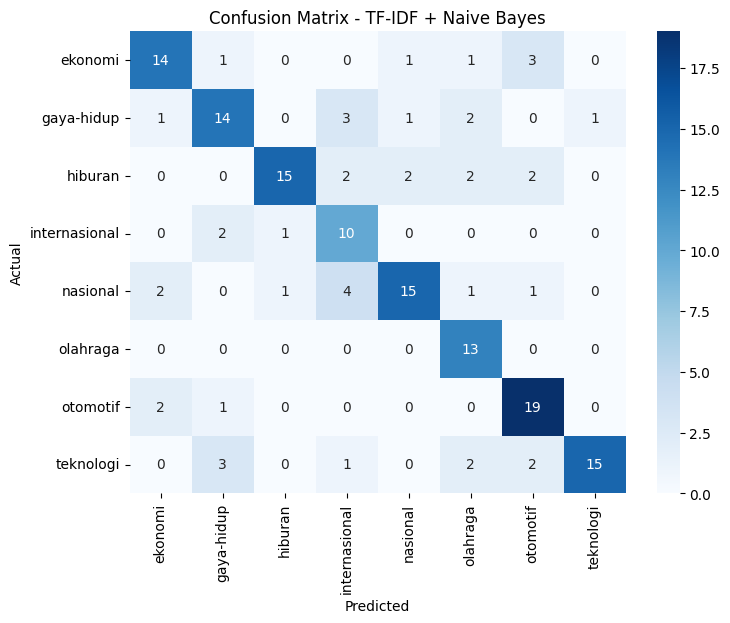

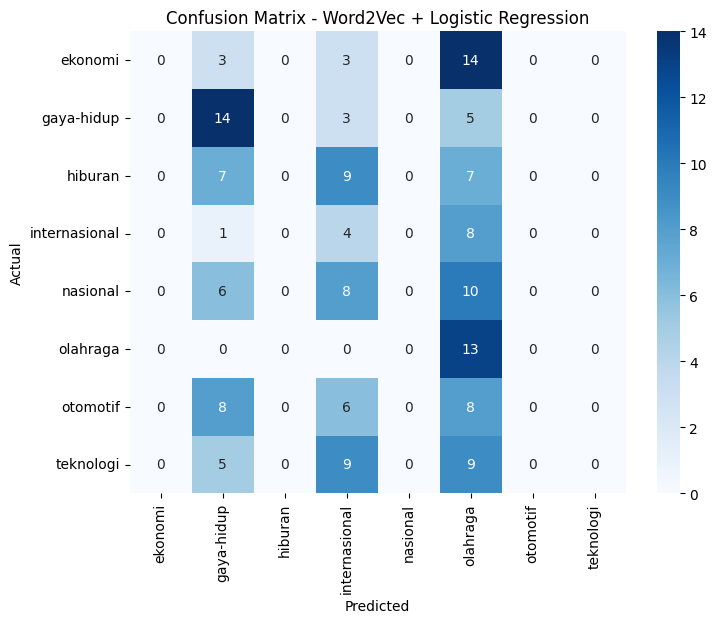

In [22]:
plot_confusion(y_test, y_pred_tfidf, "Confusion Matrix - TF-IDF + Naive Bayes")
plot_confusion(y_test, y_pred_w2v, "Confusion Matrix - Word2Vec + Logistic Regression")